In [1]:
# To disable all warnings displayed throughout the project.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# In this step, we are importing all the requred dependencies.

import pandas as pd # for data processing
import numpy as np # for working with arrays
import matplotlib.pyplot as plt # for visualization
from termcolor import colored as cl # for text customization

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # for using determine the performance of the model

We are using the publicly available Credit Card Fraud Detection dataset downloaded from Kaggle. (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [3]:
# Loading the dataset in a Pandas dataframe. 
dataset = pd.read_csv('creditcard.csv')

In [4]:
# We just verify that the loading of the dataset is successful, and we also see the first 5 records of our dataset. 
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# We now append the beginning of the dataset to the end of the dataset to find out how many rows we have in our dataset.
pd.concat([dataset.head(), dataset.tail()])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Our dataset is ready for pre-processing. We have a dataset with a total of 284806 records and without the 'Time' column. The 'V1 - V28' columns have the customer's data and credit card data which are very sensitive and cannot be exposed to public view. It has been interestingly converted into their numerical form through a process called "Principal Component Analysis" which masks the details and instead displays numbers. It also has the 'Amount' column representing the amount the transaction, and the 'Class' column which is the most important part of the dataset. The value "0" in the class column represents a Legit transaction, while a 1 in the class column represents a fraudulent transaction.

# Data Preprocessing

Now we start preparing our dataset for training our model.

In [6]:
# We first check for the number of rows that has the value "0" in their 'Class' column, and the number of rows that has the value "1".
# And then we print the number of Fraudulent Cases and the number of Legit Transactions, and then have a percentage of the transactions that are fraudulent.

cases = len(dataset)
legit_count = len(dataset[dataset.Class == 0])
fraud_count = len(dataset[dataset.Class == 1])
fraud_percentage = round(fraud_count/legit_count*100, 2)

# We will be making use of the termcolour library that we imported at the beginning of this project for making the headers and information bold.
print(cl('Data Count', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of transactions in the dataset: {}'.format(cases), attrs = ['bold']))
print(cl('Number Legit transactions: {}'.format(legit_count), attrs = ['bold']))
print(cl('Number of Fraudulent transactions: {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of transactions that are Fraudulent: {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

Data Count
--------------------------------------------
Total number of transactions in the dataset: 284807
Number Legit transactions: 284315
Number of Fraudulent transactions: 492
Percentage of transactions that are Fraudulent: 0.17
--------------------------------------------


<Axes: ylabel=' '>

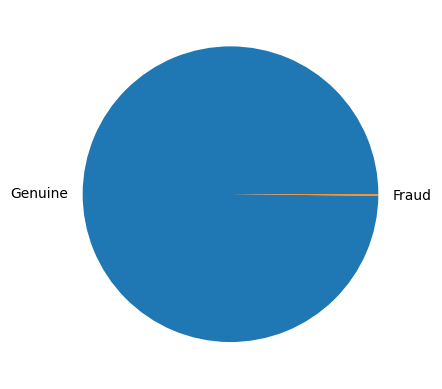

In [7]:
# We now plot a pie-chart to depict only a very small part of our dataset has fradulent transactions. 
data_piechart = dataset.copy()
data_piechart[" "] = np.where(data_piechart["Class"] == 1 ,  "Fraud", "Genuine")
data_piechart[" "].value_counts().plot(kind="pie")

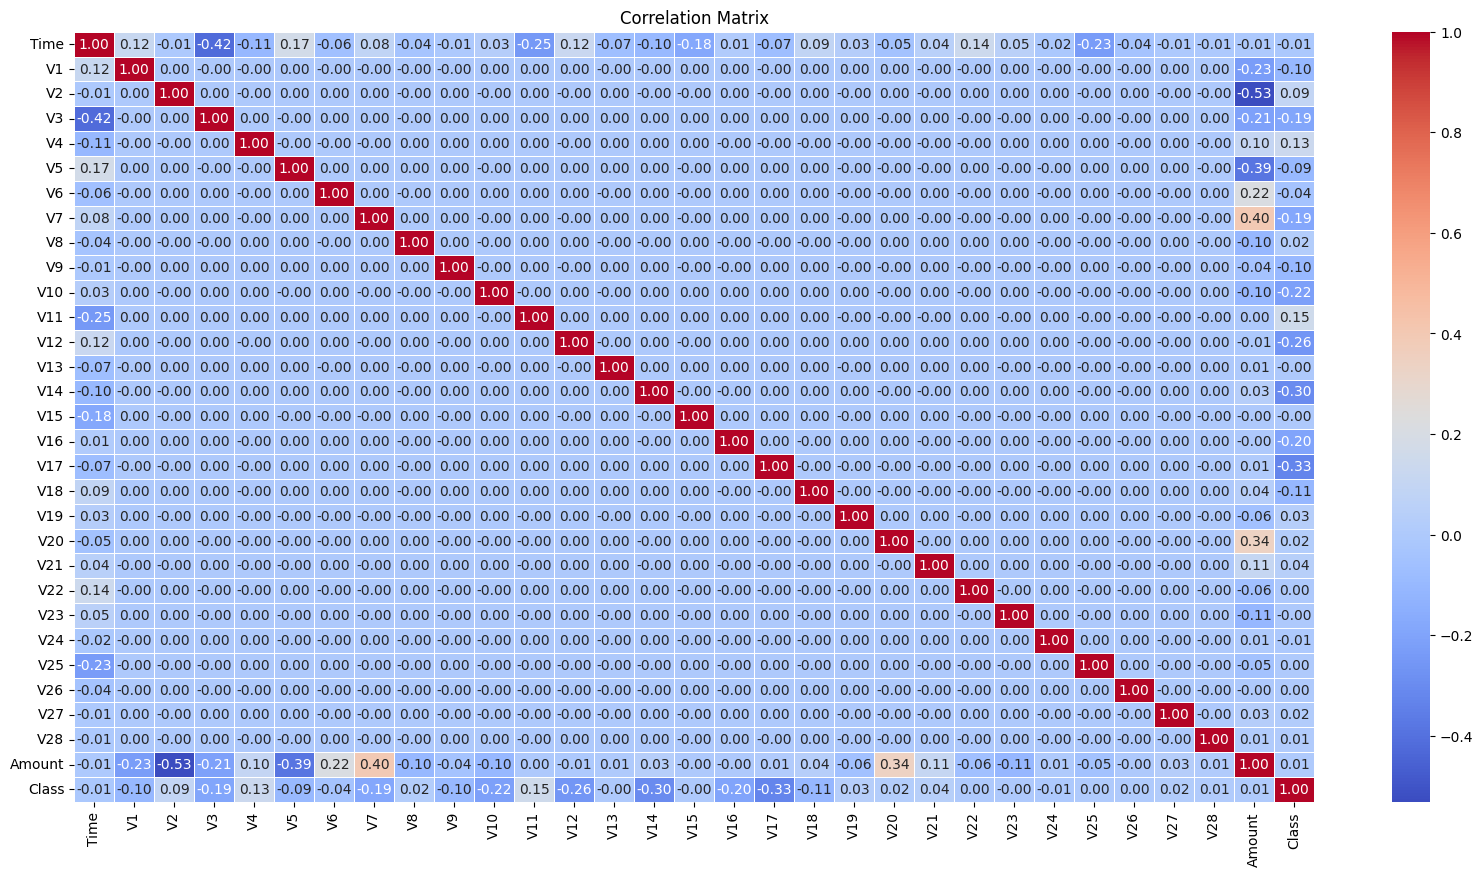

In [8]:
# We now move ahead to have a look at the heat map which gives us an idea of how features correlate with each other and what features can help us in the prediction of frauds.
correlation_matrix = dataset.corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Thus, we see that the Kaggle dataset on credit card fraud detection is extremely unbalanced because it contains a large number of ,legit transactions (284315) and a very small number of fraudulent transactions (492). This means that the dataset is heavily skewed towards legit transactions, which can create issues when training a machine learning model.

An imbalanced dataset can lead to a model that is biased towards the majority class, resulting in poor performance when predicting the minority class. In the case of credit card fraud detection, this means that a model trained on this dataset may perform poorly when identifying fraudulent transactions, as it has not been exposed to enough examples of fraud to learn how to distinguish them from non-fraudulent transactions.

To overcome the imbalance in the dataset, we will use the undersampling technique, which can help balance the number of samples in each class. Additionally, we will also use evaluation metrics such as precision, recall, and F1-score instead of accuracy, as accuracy can be misleading in the presence of imbalanced datasets.

In [9]:
# Now we move forward towards getting more data about our transaction cases from the dataset. 
legit_trans = dataset[dataset.Class == 0]
fraud_trans = dataset[dataset.Class == 1]

# In both these lines, we declare variables for the legit and fraud cases and separate out the rows that have the "0" in the 'Class' column and "1" in the 'Class' column
# This step is also going to help us for separating the data for analysis.

# Now we go for checking if things went right, and we see that our legit_trans variable has got 284315 items, while our fraud_trans variable has got 492 variables just as it should have been. And we have 30 columns, and not 31 (like the dataset), as we had dropped out the 'Time' column at the very beginning.
print(legit_trans.shape)
print(fraud_trans.shape)

(284315, 31)
(492, 31)


# Explanatory Data Analytics

We start performing some data analysis before we process the data for training our model.

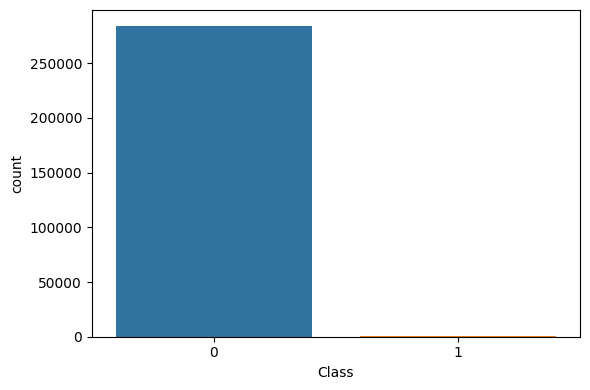

In [10]:
fig, ax = plt.subplots(figsize = (6,4))

ax = sns.countplot(x="Class", data=dataset)
plt.tight_layout()

As we can see from this countplot, the classes 0 & 1 are highly imbalanced. Since most of the features are in PCA form except for Time and Amount, we will have to take a deeper look into these two features. 

In [11]:
# No we will go forward and see some statistical view of the 'Amonunt' column of the Fraudulent and Legit transactions. 
print(cl('CASE STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Amount details of the Legit Transaction', attrs = ['bold']))
print(legit_trans.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Amount details of the Fraudulent Transaction', attrs = ['bold']))
print(fraud_trans.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE STATISTICS
--------------------------------------------
Amount details of the Legit Transaction
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
Amount details of the Fraudulent Transaction
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In [12]:
dataset['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

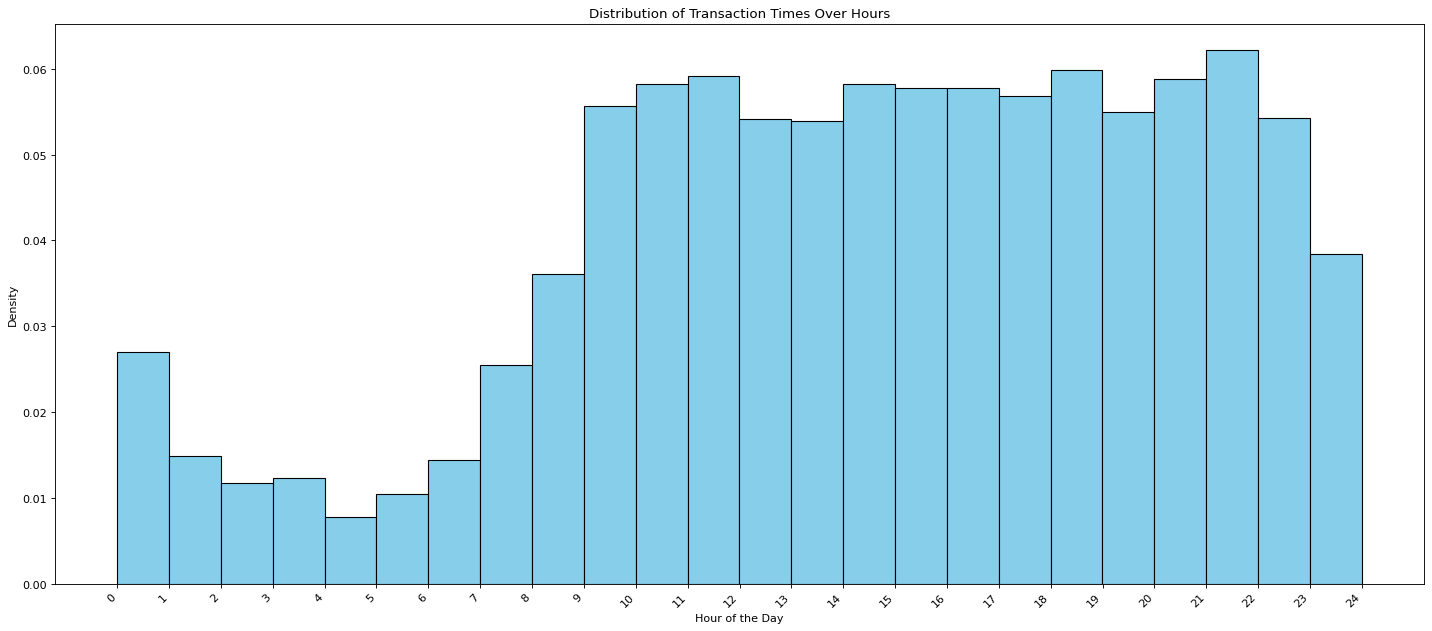

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is your DataFrame
plt.figure(figsize=(18, 8), dpi=80)

# Convert 'Time' to hours
dataset['Hour'] = (dataset['Time'] / 3600) % 24

# Using histplot instead of displot
sns.histplot(data=dataset, x='Hour', bins=24, kde=False, color='skyblue', palette='viridis', stat='density')

# Access the axes for customization
ax = plt.gca()

# Customize bar colors
bar_color = 'skyblue'
for bar in ax.patches:
    bar.set_facecolor(bar_color)

# Adjust x-axis ticks and increase spacing
plt.xticks(range(25), rotation=45, ha='right', fontsize=10)
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.title('Distribution of Transaction Times Over Hours')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


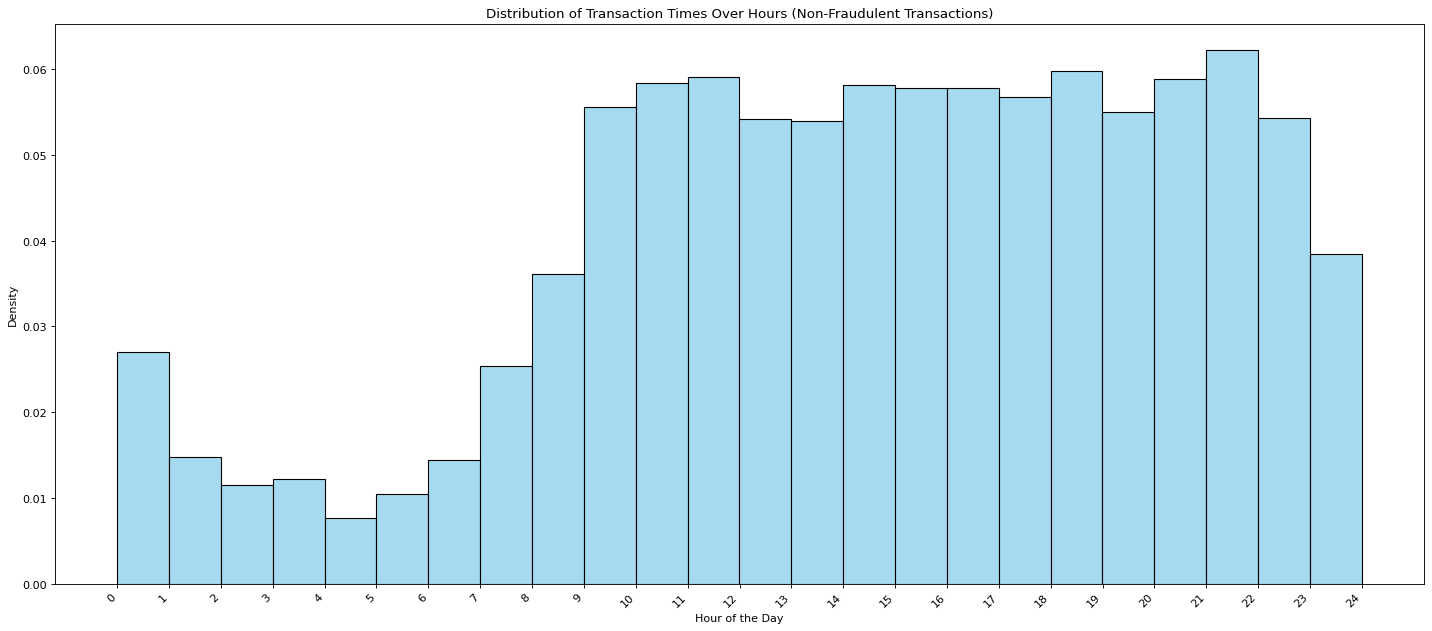

In [14]:
# Visualization of Legit Transactions
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is your DataFrame
plt.figure(figsize=(18, 8), dpi=80)

# Convert 'Time' to hours
dataset['Hour'] = (dataset['Time'] / 3600) % 24

# Filter data for non-fraudulent transactions
df_copy_nofraud = dataset[dataset['Class'] == 0]

# Create histogram for non-fraudulent transactions
sns.histplot(data=df_copy_nofraud, x='Hour', bins=24, color='skyblue', stat='density', kde=False)

# Adjust x-axis ticks and increase spacing
plt.xticks(range(25), rotation=45, ha='right', fontsize=10)
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.title('Distribution of Transaction Times Over Hours (Non-Fraudulent Transactions)')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


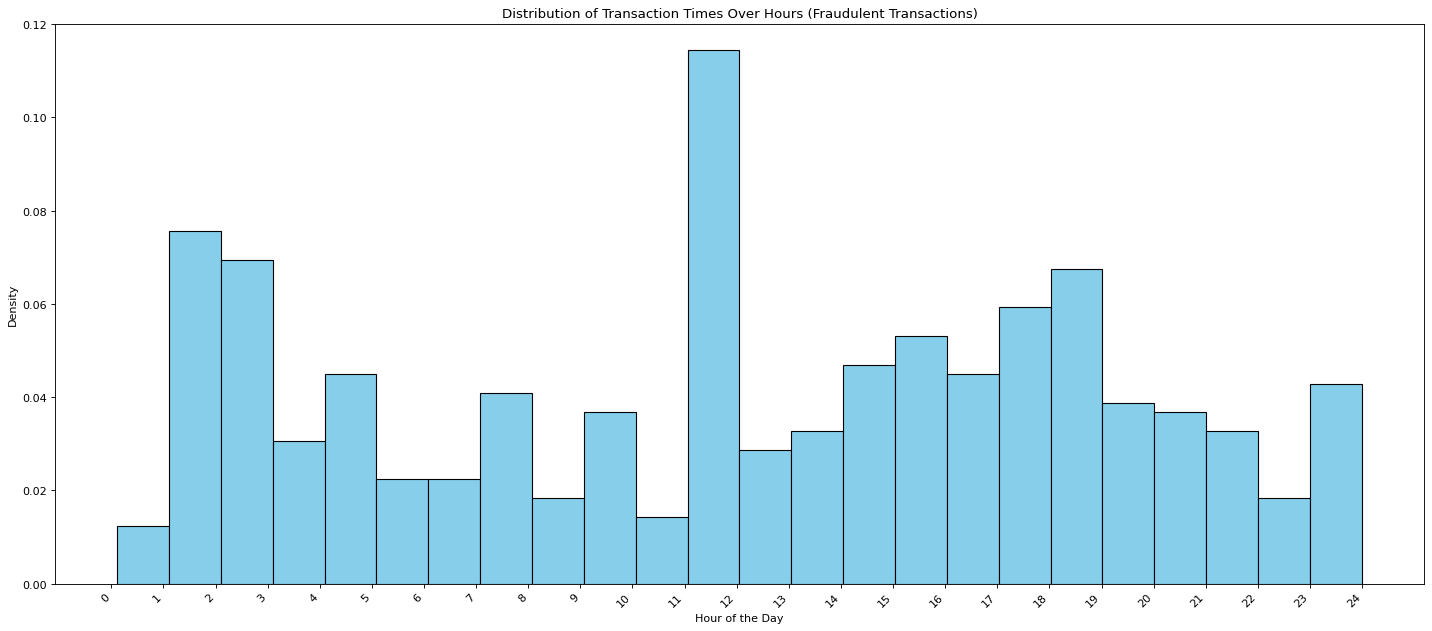

In [15]:
#Visualization of fraud transactions
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is your DataFrame
plt.figure(figsize=(18, 8), dpi=80)

# Convert 'Time' to hours
dataset['Hour'] = (dataset['Time'] / 3600) % 24

# Filter data for fraudulent transactions
df_fraud = dataset[dataset['Class'] == 1]

# Using histplot instead of displot
sns.histplot(data=df_fraud, x='Hour', bins=24, kde=False, color='skyblue', palette='viridis', stat='density')

# Access the axes for customization
ax = plt.gca()

# Customize bar colors
bar_color = 'skyblue'
for bar in ax.patches:
    bar.set_facecolor(bar_color)

# Adjust x-axis ticks and increase spacing
plt.xticks(range(25), rotation=45, ha='right', fontsize=10)
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.title('Distribution of Transaction Times Over Hours (Fraudulent Transactions)')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In analyzing the distribution of transaction times for both non-fraudulent and fraudulent transactions, notable patterns emerge. Non-fraudulent transactions exhibit a relatively steady distribution across the 24-hour period, with peak activity during normal business hours. This suggests that legitimate transactions predominantly occur during typical daily activities. On the other hand, fraudulent transactions also occur throughout the day, displaying potential peaks during off-peak hours or specific time ranges outside regular business hours. Fraudsters may strategically choose these periods to exploit potential weaknesses in monitoring and response mechanisms. Notably, late at night or during weekends, when financial institutions may have reduced staff and individuals are less likely to actively monitor their accounts, becomes a prime time for fraudulent activities. It is crucial for financial institutions and individuals to remain vigilant, especially during these off-peak hours, and consider implementing additional security measures to mitigate the risk of fraudulent transactions during these susceptible time frames.

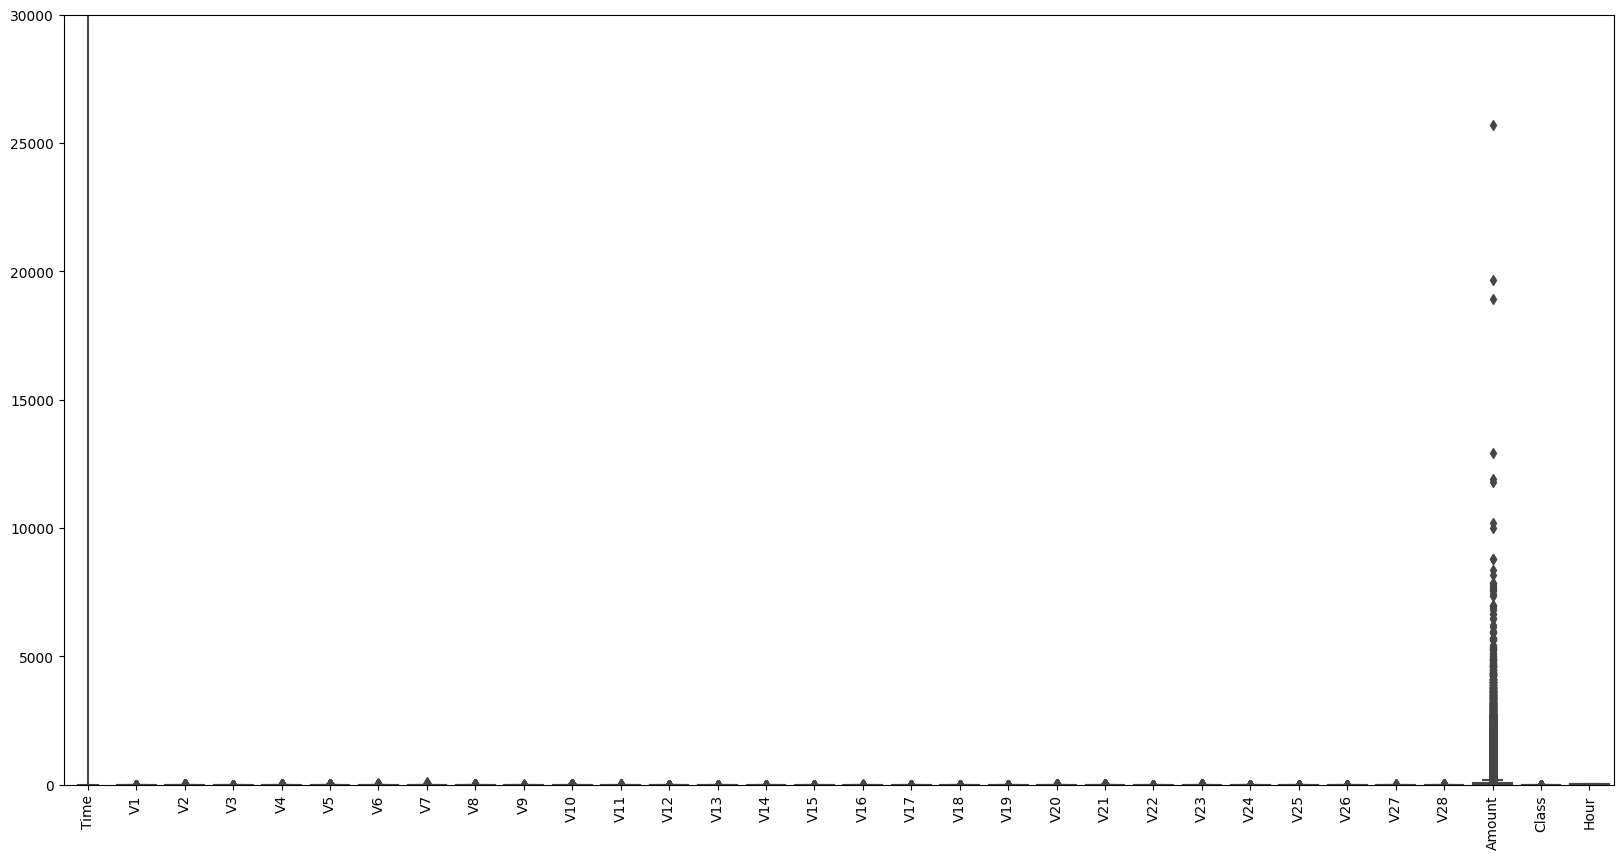

In [16]:
# We now check if our dataset has any outliers. 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)

# Set y-axis range to -30000 to 30000
plt.ylim(0, 30000)

plt.show()

We can thus see that the 'Amount' column has a considerable amount of outliers. Outliers in a dataset refer to observations that deviate significantly from the majority of the data points, potentially influencing statistical analyses and model performance. In the context of the credit card transactions dataset, the 'Amount' column exhibits outliers, as evidenced by values that fall well outside the typical range. We will be using various methods to remove the outliers during the processing of our data.

In [17]:
# Our final step before we move onto Processing our data for training our model is to check for missing (null) values in the dataset. 

dataset.isnull().values.any()

False

Luckily we don't have any missing values. We can therefore now move into processing our data for training our model.

# Data Processing


In [18]:
# First, we drop our the 'Time' and Hour columnn since it will never be needed for training our model and then again have a look at dataset, this time without the 'Time' column.
dataset.drop('Time', axis = 1, inplace = True)
dataset.drp('Hour', axis =1, inplace = True)

# Now we have a look at our dataset without the 'Time' and 'Hour' column, using the same command performed earlier. 
pd.concat([dataset.head(), dataset.tail()])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.996111
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.996389
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.996667
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.996667
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,23.997778


Our next aim is to remove the outliers from the Amount column. 


In [19]:
# Robust Scaling
# For scaling the 'Amount' column, we use the RobustScaler. It is preferred over Standard Scaler in the Amount column because the amount column has outliers that can affect the mean and standard deviation used by the Standard Scaler. 
# Robust Scaler uses the median and interquartile range to scale the data, making it more resistant to the effect of outliers. 
# On the other hand, Standard Scaler scales the data based on the mean and standard deviation, making it sensitive to the outliers. Therefore, in the presence of outliers, Robust Scaler is a better choice to ensure the data is scaled properly.

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(dataset[["Amount"]])
dataset[["Amount"]] = scaler.transform(dataset[["Amount"]])

pd.concat([dataset.head(), dataset.tail()])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0,0.000556
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0,23.996111
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0,23.996389
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0,23.996667
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0,23.996667
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0,23.997778


When we see the 'Amount' column we see that it has got a new set of values that was not present before we scaled our dataset.
We are going to redo the plotting to see if the RobustScaler has trully worked or not, and so we run the same code again.

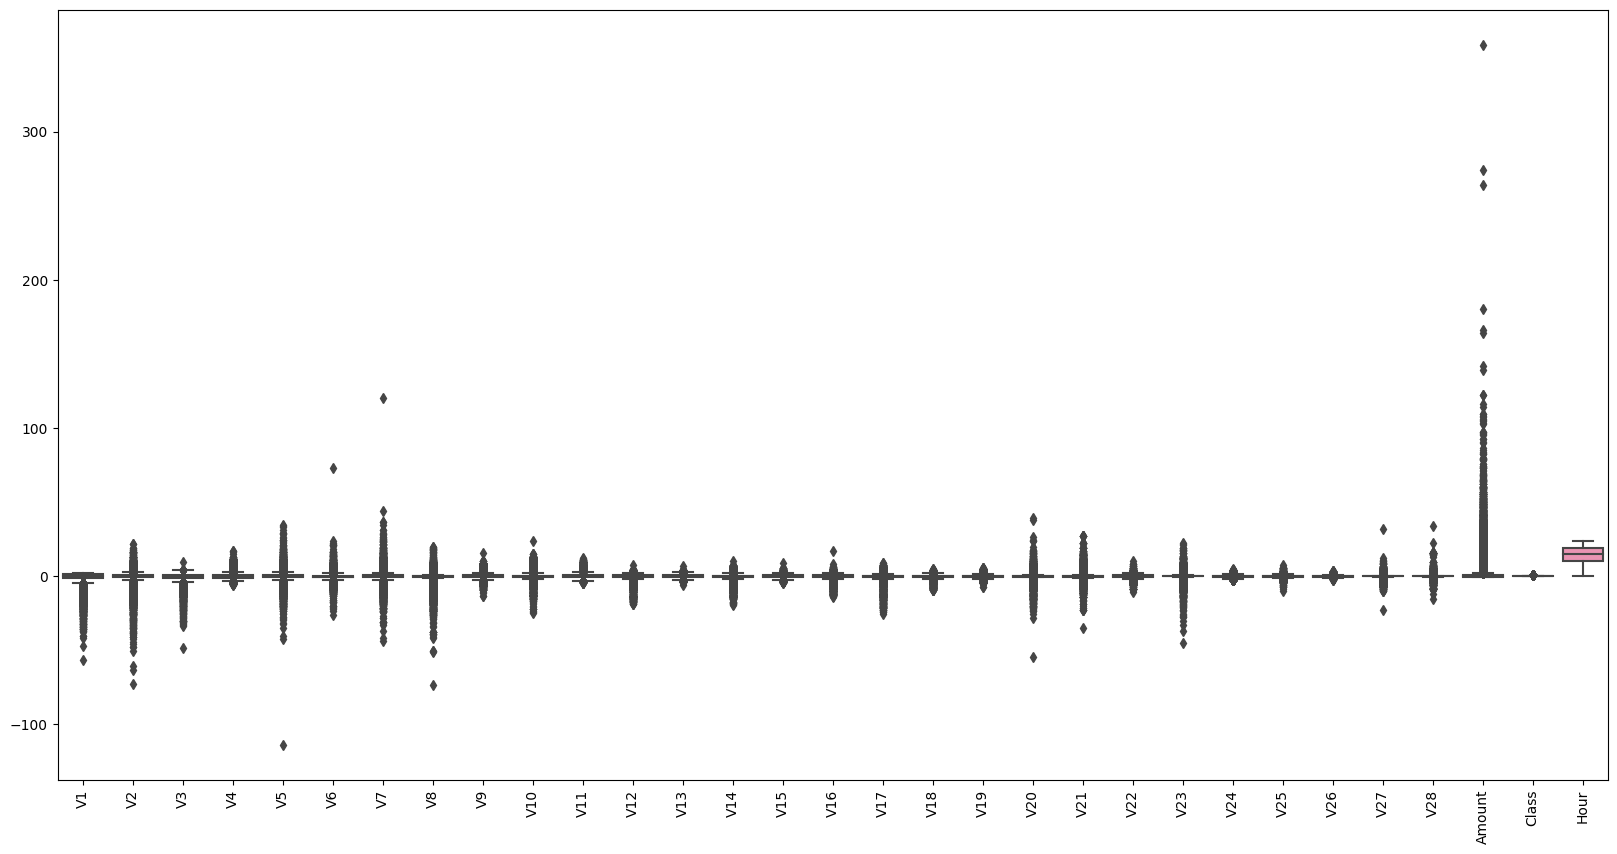

In [20]:
# Rerunning boxplot after scaling the data. 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.show()

We thus see the range of the data in the 'Amount' column has been reduced a lot. We are now going to check the range of the data of the 'Amount' column for double verification. 

## Training and Testing Data Split

In [21]:
from sklearn.model_selection import train_test_split

Features = dataset.drop('Class', axis=1)  # Features
Class = dataset['Class']  # Target variable

# Assuming 'Features' is your feature matrix and 'Class' is your target variable
Features_train, Features_test, Class_train, Class_test = train_test_split(Features, Class, test_size=0.2, random_state=21)


## Undersampling

In [22]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under-Sampling to the training set
rus = RandomUnderSampler(random_state=42)
Features_resampled, Class_resampled = rus.fit_resample(Features_train, Class_train)


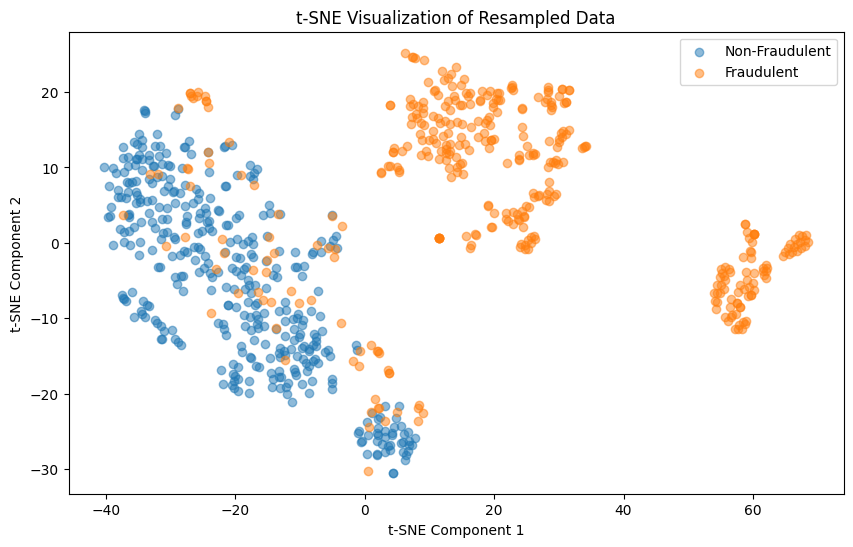

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'Features_resampled' is your normalized feature matrix after resampling
# Assuming 'Class_resampled' is your target variable after resampling

# Initialize t-SNE with 2 components (2D visualization)
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
Features_tsne = tsne.fit_transform(Features_resampled)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 6))

# Scatter plot for non-fraudulent transactions
plt.scatter(Features_tsne[Class_resampled == 0, 0], Features_tsne[Class_resampled == 0, 1], label='Non-Fraudulent', alpha=0.5)

# Scatter plot for fraudulent transactions
plt.scatter(Features_tsne[Class_resampled == 1, 0], Features_tsne[Class_resampled == 1, 1], label='Fraudulent', alpha=0.5)

# Set plot labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Resampled Data')

# Show legend
plt.legend()

# Show the plot
plt.show()


We see that the most of the datapoints are coinciding with one another, thus undersampling has been successful.

In [24]:
print("Class distribution before undersampling:")
print(Class.value_counts())

# Check class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(Class_resampled).value_counts())


Class distribution before undersampling:
0    284315
1       492
Name: Class, dtype: int64

Class distribution after undersampling:
0    383
1    383
Name: Class, dtype: int64


Undersampling has been successful as we see from the Class distribution.

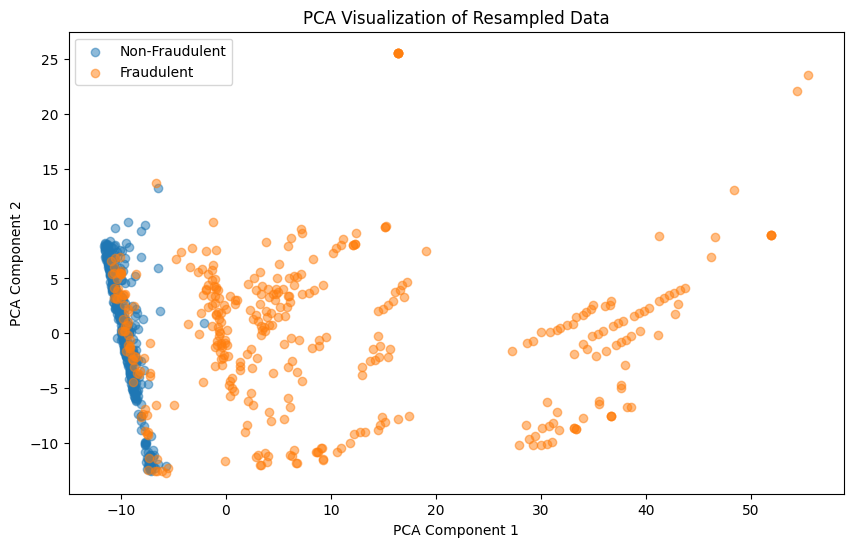

In [25]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
Features_pca = pca.fit_transform(Features_resampled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(Features_pca[Class_resampled == 0, 0], Features_pca[Class_resampled == 0, 1], label='Non-Fraudulent', alpha=0.5)
plt.scatter(Features_pca[Class_resampled == 1, 0], Features_pca[Class_resampled == 1, 1], label='Fraudulent', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Resampled Data')
plt.legend()
plt.show()


The PCA visualization shows the same.

# Training our model

In [22]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # for using the Decision tree algorithm

tree_model = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy')
tree_model.fit(Features_train, Class_train)
tree_yhat = tree_model.predict(Features_test)

In [23]:
print(cl('Performance of Decision Tree algorithm trained model', attrs = ['bold']))
print(cl('********************************************************************', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {:.5f}'.format(accuracy_score(Class_test, tree_yhat)), attrs = ['bold']))
print(cl('Recall score of the Decision Tree model is {:.5f}'.format(recall_score(Class_test, tree_yhat)), attrs = ['bold']))
print(cl('Precision score of the Decision Tree model is {:.5f}'.format(precision_score(Class_test, tree_yhat)), attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {:.5f}'.format(f1_score(Class_test, tree_yhat)), attrs = ['bold']))

Performance of Decision Tree algorithm trained model
********************************************************************
Accuracy score of the Decision Tree model is 0.99940
Recall score of the Decision Tree model is 0.71429
Precision score of the Decision Tree model is 0.92105
F1 score of the Decision Tree model is 0.80460


In [24]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression # for using the Logistic regression algorithm

regression_model = LogisticRegression(max_iter = 10000) #adding max_iter function to avoid running into a ITERATIONS LIMIT eroor.
regression_model.fit(Features_train, Class_train)
regression_model_yhat = regression_model.predict(Features_test)

In [25]:
print(cl('Performance of Logistic Regression algorithm trained model', attrs = ['bold']))
print(cl('********************************************************************', attrs = ['bold']))
print(cl('Accuracy score of the LogisticRegression model is {:.5f}'.format(accuracy_score(Class_test, regression_model_yhat)), attrs = ['bold']))
print(cl('Recall score of the LogisticRegression model is {:.5f}'.format(recall_score(Class_test, regression_model_yhat)), attrs = ['bold']))
print(cl('Precision score of the LogisticRegression model is {:.5f}'.format(precision_score(Class_test, regression_model_yhat)), attrs = ['bold']))
print(cl('F1 score of the LogisticRegression model is {:.5f}'.format(f1_score(Class_test, regression_model_yhat)), attrs = ['bold']))

Performance of Logistic Regression algorithm trained model
********************************************************************
Accuracy score of the LogisticRegression model is 0.99907
Recall score of the LogisticRegression model is 0.55102
Precision score of the LogisticRegression model is 0.85714
F1 score of the LogisticRegression model is 0.67081


In [26]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier # for using the KNN algorithm

n = 5

knn_model = KNeighborsClassifier(n_neighbors = n)
knn_model.fit(Features_train, Class_train)
knn_model_yhat = knn_model.predict(Features_test)

In [27]:
print(cl('Performance of KNN algorithm trained model', attrs = ['bold']))
print(cl('********************************************************', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {:.5f}'.format(accuracy_score(Class_test, knn_model_yhat)), attrs = ['bold']))
print(cl('Recall score of the KNN model is {:.5f}'.format(recall_score(Class_test, knn_model_yhat)), attrs = ['bold']))
print(cl('Precision score of the KNN model is {:.5f}'.format(precision_score(Class_test, knn_model_yhat)), attrs = ['bold']))
print(cl('F1 score of the KNN model is {:.5f}'.format(f1_score(Class_test, knn_model_yhat)), attrs = ['bold']))

Performance of KNN algorithm trained model
********************************************************
Accuracy score of the KNN model is 0.99935
Recall score of the KNN model is 0.72449
Precision score of the KNN model is 0.87654
F1 score of the KNN model is 0.79330


In [28]:
# SVM
from sklearn.svm import SVC # for using the SVM algorithm

svm_model = SVC()
svm_model.fit(Features_train, Class_train)
svm_model_yhat = svm_model.predict(Features_test)

In [29]:
print(cl('Performance of SVM algorithm trained model', attrs = ['bold']))
print(cl('********************************************************', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {:.5f}'.format(accuracy_score(Class_test, svm_model_yhat)), attrs = ['bold']))
print(cl('Recall score of the SVM model is {:.5f}'.format(recall_score(Class_test, svm_model_yhat)), attrs = ['bold']))
print(cl('Precision score of the SVM model is {:.5f}'.format(precision_score(Class_test, svm_model_yhat)), attrs = ['bold']))
print(cl('F1 score of the SVM model is {:.5f}'.format(f1_score(Class_test, svm_model_yhat)), attrs = ['bold']))

Performance of SVM algorithm trained model
********************************************************
Accuracy score of the SVM model is 0.99933
Recall score of the SVM model is 0.66327
Precision score of the SVM model is 0.92857
F1 score of the SVM model is 0.77381


In [30]:
# Random Forest Tree

from sklearn.ensemble import RandomForestClassifier # for using the Random forest tree algorithm

rf_model = RandomForestClassifier(max_depth = 6)
rf_model.fit(Features_train, Class_train)
rf_model_yhat = rf_model.predict(Features_test)

In [31]:
print(cl('Performance of Random Forest Tree trained model', attrs = ['bold']))
print(cl('********************************************************', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {:.5f}'.format(accuracy_score(Class_test, rf_model_yhat)), attrs = ['bold']))
print(cl('Recall score of the Random Forest Tree model is {:.5f}'.format(recall_score(Class_test, rf_model_yhat)), attrs = ['bold']))
print(cl('Precision score of the Random Forest Tree model is {:.5f}'.format(precision_score(Class_test, rf_model_yhat)), attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {:.5f}'.format(f1_score(Class_test, rf_model_yhat)), attrs = ['bold']))

Performance of Random Forest Tree trained model
********************************************************
Accuracy score of the Random Forest Tree model is 0.99933
Recall score of the Random Forest Tree model is 0.68367
Precision score of the Random Forest Tree model is 0.90541
F1 score of the Random Forest Tree model is 0.77907


In [32]:
# XG Boost

from xgboost import XGBClassifier # for using the XGBoost algorithm

xgb_model = XGBClassifier(max_depth = 6)
xgb_model.fit(Features_train, Class_train)
xgb_model_yhat = xgb_model.predict(Features_test)

In [33]:
print(cl('Performance of XG Boost trained model', attrs = ['bold']))
print(cl('********************************************************', attrs = ['bold']))
print(cl('Accuracy score of the XG Boost model is {:.5f}'.format(accuracy_score(Class_test, xgb_model_yhat)), attrs = ['bold']))
print(cl('Recall score of the XG Boost model is {:.5f}'.format(recall_score(Class_test, xgb_model_yhat)), attrs = ['bold']))
print(cl('Precision score of the XG Boost model is {:.5f}'.format(precision_score(Class_test, xgb_model_yhat)), attrs = ['bold']))
print(cl('F1 score of the XG Boost model is {:.5f}'.format(f1_score(Class_test, xgb_model_yhat)), attrs = ['bold']))

Performance of XG Boost trained model
********************************************************
Accuracy score of the XG Boost model is 0.99953
Recall score of the XG Boost model is 0.77551
Precision score of the XG Boost model is 0.93827
F1 score of the XG Boost model is 0.84916


We have thus successfully trained our model using various algorithms and we have also seen the performance each algorithm delivered to us and represented the performance metrics rounded off to 5 places of decimal.

Thus we have also successfully tested our XGB model against a randomly generated dataset.

In [34]:
import pickle

In [35]:
filename = 'trained_model_tree_model.sav'
pickle.dump(tree_model, open(filename, 'wb'))

In [36]:
loaded_model = pickle.load(open('trained_model_tree_model.sav', 'rb'))

In [37]:
input_data = (-29.20032859,16.15570143,-30.01371249,6.47673118,-21.22580965,-4.902997397,-19.79124841,19.16832739,-3.617241786,-7.870121943,4.066255073,-5.661492423,1.292950145,-5.079845681,-0.12652274,-5.24447152,-11.27497259,-4.678436529,0.650807371,1.715861824,1.809370933,-2.175815203,-1.365104108,0.17428636,2.103868072,-0.209943999,1.278680971,0.372392714,1.089778523
)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The transaction is not fraud')
else:
  print('The transaction is fraud')

[1]
The transaction is fraud


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [38]:
fraud_dataset = dataset[dataset['Class'] == 1]

In [46]:
sample_size = 5
sampled_dataset = fraud_dataset.sample(n=sample_size, random_state=42)

In [47]:
sampled_dataset.to_csv('fraud_sampled_dataset.csv', index=False)